In [1]:
import argparse
import numpy as np
import pandas as pd
import os
import src.nn_utils as nn
import src.pred_utils as pred

In [2]:
data_folder = "data/"


In [3]:
data = pd.read_csv(os.path.join(f"../{data_folder}", "train.csv"))

In [4]:
# Prepare test and train data
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)  # shuffle before splitting into dev and training sets

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

_, m_train = X_train.shape

In [5]:
X_train.shape

(784, 41000)

In [6]:
W1, b1, W2, b2 = nn.gradient_descent(X_train, Y_train, m, 0.10, 500)

Iteration:  0
[3 8 5 ... 7 7 7] [0 3 1 ... 0 9 5]
0.08485365853658537
Iteration:  10
[3 4 9 ... 7 7 7] [0 3 1 ... 0 9 5]
0.21992682926829268
Iteration:  20
[0 4 9 ... 7 7 7] [0 3 1 ... 0 9 5]
0.2919512195121951
Iteration:  30
[0 8 9 ... 7 7 7] [0 3 1 ... 0 9 5]
0.35
Iteration:  40
[0 8 9 ... 5 7 7] [0 3 1 ... 0 9 5]
0.4228780487804878
Iteration:  50
[0 8 9 ... 5 7 7] [0 3 1 ... 0 9 5]
0.5007560975609756
Iteration:  60
[0 3 1 ... 5 7 7] [0 3 1 ... 0 9 5]
0.562439024390244
Iteration:  70
[0 3 1 ... 5 7 7] [0 3 1 ... 0 9 5]
0.6038292682926829
Iteration:  80
[0 3 1 ... 5 7 7] [0 3 1 ... 0 9 5]
0.6351463414634146
Iteration:  90
[0 3 1 ... 5 7 7] [0 3 1 ... 0 9 5]
0.6613658536585366
Iteration:  100
[0 3 1 ... 5 7 7] [0 3 1 ... 0 9 5]
0.6830731707317074
Iteration:  110
[0 3 1 ... 5 7 7] [0 3 1 ... 0 9 5]
0.7017073170731707
Iteration:  120
[0 3 1 ... 5 7 7] [0 3 1 ... 0 9 5]
0.7172682926829268
Iteration:  130
[0 3 1 ... 5 9 7] [0 3 1 ... 0 9 5]
0.7294634146341463
Iteration:  140
[0 3 1 ... 5 9

In [7]:
test_preds = pred.make_predictions(X_test, W1, b1, W2, b2)

In [8]:
nn.get_accuracy(test_preds, Y_test)

[7 2 8 1 4 0 5 0 0 7 6 0 6 8 9 9 7 1 3 5 8 6 1 1 0 3 2 1 5 5 4 2 3 8 1 0 1
 8 8 1 2 6 3 1 6 0 1 4 6 3 7 5 5 3 4 1 9 9 5 4 9 8 9 0 6 6 2 9 4 6 1 6 5 8
 4 2 2 2 2 8 6 2 4 6 1 0 9 3 7 9 1 1 7 4 1 2 1 8 4 1 6 9 3 1 4 7 7 4 7 6 9
 6 4 6 3 0 7 5 5 1 1 9 0 8 0 1 2 8 4 9 3 5 9 2 9 0 1 4 6 7 9 5 8 5 8 0 0 2
 8 3 1 6 9 2 3 9 9 4 0 4 8 3 1 1 0 7 6 0 6 8 2 8 7 9 9 7 7 7 6 6 7 7 6 3 9
 3 4 1 7 6 9 9 5 1 3 2 1 7 2 2 9 0 5 7 7 0 6 3 1 3 4 1 9 4 3 3 2 5 1 8 5 9
 4 3 0 9 1 8 1 0 9 9 2 9 9 7 7 2 1 5 0 6 6 4 3 2 0 3 4 4 6 2 7 7 4 1 0 2 7
 0 2 0 4 4 1 8 1 2 6 6 8 2 6 3 9 1 5 2 7 4 1 6 4 8 8 7 7 0 1 6 9 7 7 1 0 6
 6 5 1 7 6 8 9 8 0 1 7 1 5 2 7 6 9 2 6 3 2 5 6 1 2 2 8 5 8 7 8 8 9 2 9 8 5
 7 6 1 2 5 8 3 6 5 9 5 6 5 1 8 1 8 3 8 8 0 3 4 2 5 0 9 2 9 6 4 1 1 3 0 3 1
 1 7 2 5 5 9 1 9 7 5 8 1 6 3 8 6 5 1 3 5 4 1 9 2 7 3 5 8 3 1 8 5 0 1 6 2 8
 9 7 4 3 0 7 4 3 5 2 9 7 0 9 2 9 6 8 8 1 7 9 2 9 0 2 7 5 1 6 8 8 6 3 9 1 1
 1 6 0 5 4 1 9 0 7 3 5 6 1 7 5 9 8 6 7 1 1 9 9 4 8 7 0 1 8 6 0 4 7 1 5 6 0
 3 0 0 2 1 8 3 8 4 7 9 0 

0.85

Prediction:  [7]
Label:  7


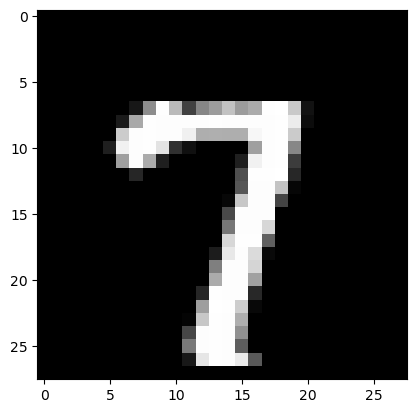

In [9]:
pred.test_prediction(0, X_test, Y_test, W1, b1, W2, b2)